In [4]:
!pip install librosa
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display
import librosa
from sklearn.model_selection import train_test_split

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

#Trae el dataset de kaggle
!kaggle datasets download alanchn31/free-spoken-digits
!unzip free-spoken-digits

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25           9588        339  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           3139         76  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           45

In [5]:
import pandas as pd
df = pd.DataFrame(columns=['filename', 'label'])

audio_dir = "free-spoken-digit-dataset-master/recordings"
for root, dirs, files in os.walk(audio_dir):
    for file in files:
        # save filename to dataframe
        df = pd.concat([df, pd.DataFrame([[file, file[0]]], columns=['filename', 'label'])])
df

,filename,label
0,2_theo_16.wav,2
0,6_theo_45.wav,6
0,1_theo_47.wav,1
0,2_george_14.wav,2
0,0_nicolas_34.wav,0
...,...,...
0,0_lucas_26.wav,0
0,1_nicolas_34.wav,1
0,2_nicolas_14.wav,2
0,4_lucas_27.wav,4


In [13]:
!rm -rf free-spoken-digit-dataset-master/spectrograms/
!mkdir free-spoken-digit-dataset-master/spectrograms/

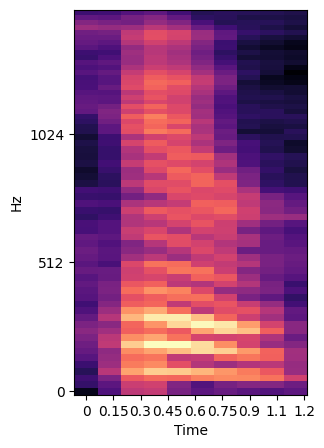

In [16]:
audio_dir = 'free-spoken-digit-dataset-master/recordings'
plt.figure(figsize=(3,5))
audio, sample_rate = librosa.load(audio_dir + '/' + df.iloc[53]["filename"], sr=None, mono=False)
sgram = librosa.stft(audio, n_fft=1024, hop_length=None)
simple_sgram, _ = librosa.magphase(sgram)
# a escala de mel
sgram_mel = librosa.feature.melspectrogram(S=simple_sgram, sr=sample_rate, n_mels=64)
# amplitud logaritmica
sgram_amp_log = librosa.amplitude_to_db(sgram_mel, ref=np.min)
librosa.display.specshow(sgram_amp_log, sr=sample_rate/2, x_axis="time",y_axis="mel")


In [6]:
for i, (index, row) in enumerate(df.iterrows()):
    plt.figure(figsize=(3,5))
    audio, sample_rate = librosa.load(audio_dir + '/' + row["filename"], sr=None, mono=False)
    sgram = librosa.stft(audio, n_fft=1024, hop_length=None)
    simple_sgram, _ = librosa.magphase(sgram)
    # a escala de mel
    sgram_mel = librosa.feature.melspectrogram(S=simple_sgram, sr=sample_rate, n_mels=64)
    # amplitud logaritmica
    sgram_amp_log = librosa.amplitude_to_db(sgram_mel, ref=np.min)
    # save the spectrogram to the new folder
    filename = 'free-spoken-digit-dataset-master/spectrograms/' + row['filename'].split('.')[0] + '.jpg'
    librosa.display.specshow(sgram_amp_log, sr=sample_rate/2, x_axis="time",y_axis="mel")
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    print(i,"/",len(df))

0 / 3000
1 / 3000
2 / 3000
3 / 3000
4 / 3000
5 / 3000
6 / 3000
7 / 3000
8 / 3000
9 / 3000
10 / 3000
11 / 3000
12 / 3000
13 / 3000
14 / 3000
15 / 3000
16 / 3000
17 / 3000
18 / 3000
19 / 3000
20 / 3000
21 / 3000
22 / 3000
23 / 3000
24 / 3000
25 / 3000
26 / 3000
27 / 3000
28 / 3000
29 / 3000
30 / 3000
31 / 3000
32 / 3000
33 / 3000
34 / 3000
35 / 3000
36 / 3000
37 / 3000
38 / 3000
39 / 3000
40 / 3000
41 / 3000
42 / 3000
43 / 3000
44 / 3000
45 / 3000
46 / 3000
47 / 3000
48 / 3000
49 / 3000
50 / 3000
51 / 3000
52 / 3000
53 / 3000
54 / 3000
55 / 3000
56 / 3000
57 / 3000
58 / 3000
59 / 3000
60 / 3000
61 / 3000
62 / 3000
63 / 3000
64 / 3000
65 / 3000
66 / 3000
67 / 3000
68 / 3000
69 / 3000
70 / 3000
71 / 3000
72 / 3000
73 / 3000
74 / 3000
75 / 3000
76 / 3000
77 / 3000
78 / 3000
79 / 3000
80 / 3000
81 / 3000
82 / 3000
83 / 3000
84 / 3000
85 / 3000
86 / 3000
87 / 3000
88 / 3000
89 / 3000
90 / 3000
91 / 3000
92 / 3000
93 / 3000
94 / 3000
95 / 3000
96 / 3000
97 / 3000
98 / 3000
99 / 3000
100 / 3000

In [8]:
df["filename"] = df["filename"].apply(lambda x: x.split(".")[0] + ".jpg")
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,filename,label
0,0_george_31.jpg,0
1,8_jackson_41.jpg,8
2,6_yweweler_25.jpg,6
3,8_nicolas_38.jpg,8
4,7_jackson_8.jpg,7


In [9]:
import cv2 as cv
image_dir = "free-spoken-digit-dataset-master/spectrograms"
df['image'] = None
def route_to_numpy_array(image_name):
    image = cv.imread(image_dir+"/"+image_name)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    resized_image = cv.resize(gray_image, (196, 256))
    # divide by 255 to normalize the data
    resized_image = resized_image.astype('float32') / 255
    return resized_image

df["image"] = df['filename'].apply(route_to_numpy_array)

In [10]:
df.head()

,filename,label,image
0,0_george_31.jpg,0,"[[0.34509805, 0.34509805, 0.34509805, 0.345098..."
1,8_jackson_41.jpg,8,"[[0.16078432, 0.16078432, 0.16078432, 0.160784..."
2,6_yweweler_25.jpg,6,"[[0.29411766, 0.29411766, 0.29411766, 0.294117..."
3,8_nicolas_38.jpg,8,"[[0.14901961, 0.14901961, 0.14901961, 0.149019..."
4,7_jackson_8.jpg,7,"[[0.19215687, 0.19215687, 0.19215687, 0.192156..."


In [15]:
# import train_test_split
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
def df_values_to_input(df):
  h = df["image"].values
  h: np.ndarray = np.stack(h)
  print(h.shape)
  print(h[0].shape)
  h = h.reshape((len(h), 196, 256, 1))
  tranformed = h
  print(tranformed.shape)
  return tranformed

train_images = df_values_to_input(train_df)
test_images = df_values_to_input(test_df)

(2400, 256, 196)
(256, 196)
(2400, 196, 256, 1)
(600, 256, 196)
(256, 196)
(600, 196, 256, 1)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(196, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 252, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 126, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 122, 64)       51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 57, 128)       204928    
                                                                 
 flatten (Flatten)           (None, 306432)            0

In [24]:
from keras.utils import to_categorical

y_train = to_categorical(train_df["label"])

batch_size = 100
epochs = 8
history = model.fit(
    train_images, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    #validation_data=(val_images, val_labels),
    verbose=1
)

Epoch 1/8
24/24 [==============================] - 4s 148ms/step - loss: 0.0187 - accuracy: 0.9962
Epoch 2/8
24/24 [==============================] - 4s 147ms/step - loss: 0.0104 - accuracy: 0.9971
Epoch 3/8
24/24 [==============================] - 4s 150ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 4/8
24/24 [==============================] - 4s 148ms/step - loss: 0.0092 - accuracy: 0.9979
Epoch 5/8
24/24 [==============================] - 4s 148ms/step - loss: 0.0059 - accuracy: 0.9987
Epoch 6/8
24/24 [==============================] - 4s 149ms/step - loss: 0.0060 - accuracy: 0.9975
Epoch 7/8
24/24 [==============================] - 4s 151ms/step - loss: 0.0047 - accuracy: 0.9983
Epoch 8/8
24/24 [==============================] - 4s 147ms/step - loss: 0.0024 - accuracy: 1.0000


19/19 [==============================] - 0s 19ms/step - loss: 0.0184 - accuracy: 0.9983
Test accuracy: 0.9983333349227905
filename                                     5_nicolas_38.jpg
label                                                       5
image       [[0.14901961, 0.14901961, 0.14901961, 0.149019...
Name: 1323, dtype: object
1/1 [==============================] - 0s 18ms/step


array([[4.1577062e-26, 3.4616592e-06, 2.3990964e-22, 1.2418250e-33,
        4.1401372e-19, 9.9999654e-01, 1.8326460e-34, 2.0739677e-27,
        2.3932051e-26, 1.6891200e-09]], dtype=float32)

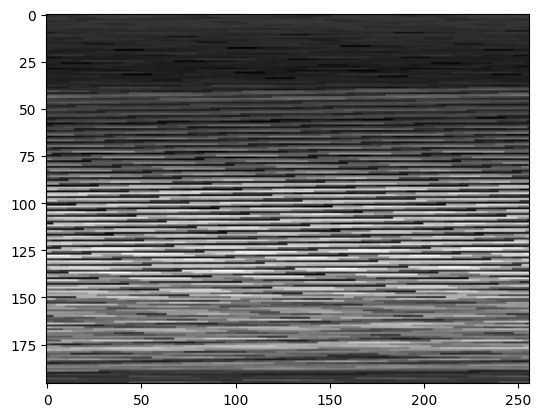

In [33]:
test_loss, test_acc = model.evaluate(test_images, to_categorical(test_df["label"]))

print('Test accuracy:', test_acc)

# get last picture from test_images
test_image = test_images[-1]
print(test_df.iloc[len(test_df)-1])
# show image
plt.imshow(test_image.reshape(196, 256), cmap='gray')

# predict only for that image
prediction = model.predict(np.expand_dims(test_image, axis=0))
prediction